In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bf-model-dev/config.json
/kaggle/input/bf-model-dev/__results__.html
/kaggle/input/bf-model-dev/tokenizer.json
/kaggle/input/bf-model-dev/tf_model.h5
/kaggle/input/bf-model-dev/tokenizer_config.json
/kaggle/input/bf-model-dev/tf_model.preproc
/kaggle/input/bf-model-dev/__notebook__.ipynb
/kaggle/input/bf-model-dev/special_tokens_map.json
/kaggle/input/bf-model-dev/__output__.json
/kaggle/input/bf-model-dev/vocab.txt
/kaggle/input/bf-model-dev/custom.css
/kaggle/input/test-val/test_data.tsv
/kaggle/input/test-val/val_data.tsv


In [2]:
!pip install -q ktrain

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.1 which is incompatible.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.24.2 which is incompatible.
featuretools 1.6.0 requires numpy>=1.21.0, but you have numpy 1.20.3 which is incompatible.


In [3]:
# load model
import tensorflow as tf
import ktrain 

from tensorflow.keras.mixed_precision import experimental as mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_policy(policy)


predictor=ktrain.load_predictor('../input/bf-model-dev')

In [4]:
# load data 
df=pd.read_csv('../input/test-val/val_data.tsv', delimiter="\t")

In [5]:
#pre-process data 
df['class']=df['class'].astype('bool')
X_val=(df['title'].str.strip() + ' [SEP] ' + df['abstract'].str.strip()).to_numpy()
y_val=df['class'].to_numpy()

In [6]:
# Check performance (to see model was loaded properly)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef


predictions=predictor.predict((X_val))
print(classification_report((y_val), predictions))
print(matthews_corrcoef((y_val), predictions))

              precision    recall  f1-score   support

       False       0.95      0.94      0.94       842
        True       0.76      0.77      0.76       200

    accuracy                           0.91      1042
   macro avg       0.85      0.86      0.85      1042
weighted avg       0.91      0.91      0.91      1042

0.7077880342050993


In [7]:
from numpy import argmax
from sklearn.metrics import precision_recall_curve

In [8]:
yhat=predictor.predict_proba((X_val))

In [9]:
yhat=yhat[:,1]

In [10]:
precision, recall, thresholds = precision_recall_curve(y_val, yhat)

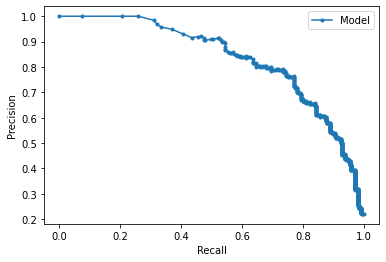

In [11]:
from matplotlib import pyplot
pyplot.plot(recall, precision, marker='.', label='Model')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()